# Logistic Regression

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [32]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [33]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
# scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
# instantiate the model
lr = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
y_pred = lr.predict(X_test_scaled)

In [38]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

Visualize the decision boundary

In [75]:
x = X_train_scaled[:, 0]
y = X_train_scaled[:, 1]

In [76]:
x, y = np.meshgrid(np.arange(x.min()-1, x.max()+1, 0.1), 
                  np.arange(y.min()-1, y.max()+1, 0.1))

In [77]:
Z = lr.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

(-2.0825424477554764, 2.8315320031817324)

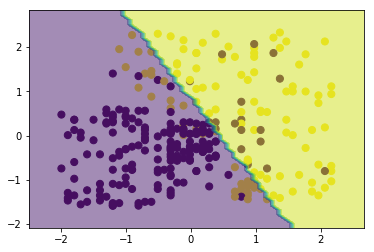

In [80]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], s=50, c=y_train)
plt.contourf(x, y, Z, alpha=0.5)
plt.xlim(X_train_scaled[:, 0].min()-0.5, X_train_scaled[:, 0].max()+0.5)
plt.ylim(X_train_scaled[:, 1].min()-0.5, X_train_scaled[:, 1].max()+0.5)

# IMPORTANT POINTS

- Using sigmoid function
- Tools:
    - from sklearn.linear_model import LogisticRegression
    - Methods: fit, predict